In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("data/resultado_concurso.csv")

In [3]:
data.head()

,Inscrição,Nome da Candidata,Gênero da Obra,Categoria,Pontuação\nConsolidada\n(média),Situação,Motivo da Desclassificação
0,on-2079236708,Andreia Fernandes Soares Leite,romance,não se aplica,30.0,classificado,NaN
1,on-1706634731,Andréia Penha Delmaschio,romance,não se aplica,30.0,classificado,NaN
2,on-972558500,Anna Barbara de Freitas Carneiro Proietti,romance,não se aplica,30.0,classificado,NaN
3,on-1748826782,Carolina Maria Campos de Saboya,poesia,não se aplica,30.0,classificado,NaN
4,on-1618652465,Caroline dos Santos Rodrigues,poesia,não se aplica,30.0,classificado,NaN


In [4]:
df1 = data[data["Gênero da Obra"] == "poesia"].reset_index()

In [5]:
df1[df1["Nome da Candidata"] == "Leide Marcia Fuzeto Gameiro"]

,index,Inscrição,Nome da Candidata,Gênero da Obra,Categoria,Pontuação\nConsolidada\n(média),Situação,Motivo da Desclassificação
342,922,on-1008632902,Leide Marcia Fuzeto Gameiro,poesia,não se aplica,17.5,classificado,NaN


In [6]:
df1.count()

index                              799
Inscrição                          799
Nome da Candidata                  799
Gênero da Obra                     799
Categoria                          799
Pontuação\nConsolidada\n(média)    799
Situação                           799
Motivo da Desclassificação         228
dtype: int64

In [7]:
data.Categoria.unique()

array(['não se aplica', 'negra', 'PcD', 'PcD e Outros', 'quilombola',
       'indígena'], dtype=object)

In [8]:
df2 = df1[df1["Categoria"] == "não se aplica"].reset_index()

In [9]:
df2[df2["Nome da Candidata"] == "Leide Marcia Fuzeto Gameiro"]

,level_0,index,Inscrição,Nome da Candidata,Gênero da Obra,Categoria,Pontuação\nConsolidada\n(média),Situação,Motivo da Desclassificação
342,342,922,on-1008632902,Leide Marcia Fuzeto Gameiro,poesia,não se aplica,17.5,classificado,NaN


In [16]:
df3 = df2.groupby(['Pontuação\nConsolidada\n(média)']).count().reset_index().rename(columns={"Pontuação\nConsolidada\n(média)": "pontuacao", "index": "quantidade"})

In [19]:
df4 = df3[["pontuacao", "quantidade"]].sort_values(by="pontuacao", ascending=False)

In [26]:
df4

,pontuacao,quantidade
46,30.0,9
45,28.5,19
44,27.5,2
43,27.0,35
42,26.0,4
41,25.5,29
40,24.5,13
39,24.0,25
38,23.5,4
37,23.0,13


<AxesSubplot:xlabel='pontuacao', ylabel='quantidade'>

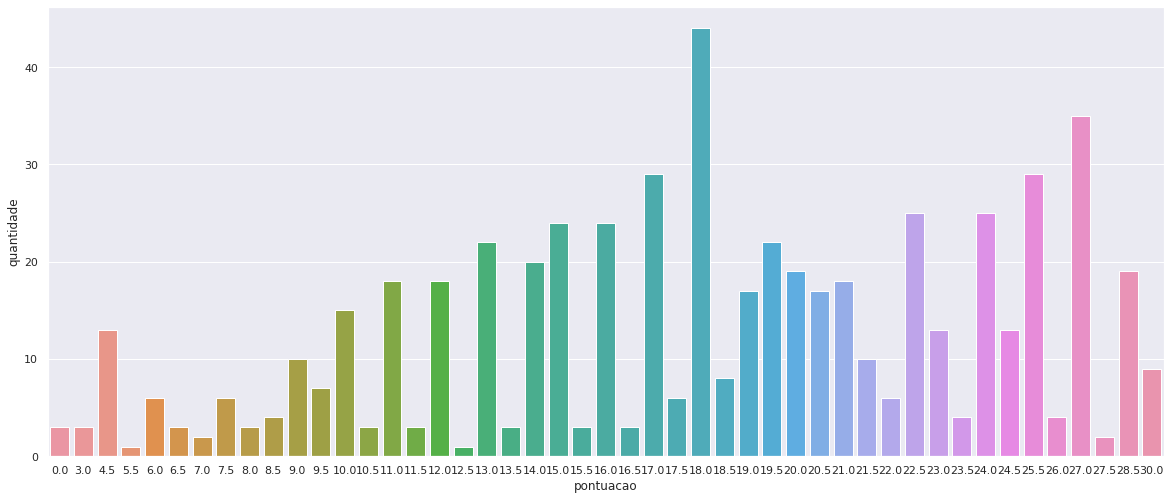

In [28]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=df4, x="pontuacao", y="quantidade")